<a href="https://colab.research.google.com/github/Jainish5658/Physics-Informed-Nueral-Networks/blob/main/Overdamped_harmonic_oscilator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.8 MB/s eta 0:00:00


No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)
Compiling model...
Building feed-forward neural network...
'build' took 0.127555 s

'compile' took 0.925539 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [2.42e+00, 1.00e+00, 3.96e+02]    [2.54e+00, 1.00e+00, 3.96e+02]    [1.34e+00]    
1000      [4.60e-03, 1.80e-05, 3.06e-09]    [1.36e-01, 1.80e-05, 3.06e-09]    [9.64e-02]    
2000      [1.08e-03, 9.46e-07, 3.42e-08]    [2.03e-01, 9.46e-07, 3.42e-08]    [1.28e-01]    
3000      [4.13e-04, 1.77e-07, 7.37e-09]    [2.41e-01, 1.77e-07, 7.37e-09]    [1.44e-01]    
4000      [1.95e-04, 5.81e-08, 5.25e-09]    [2.68e-01, 5.81e-08, 5.25e-09]    [1.53e-01]    
5000      [1.11e-04, 5.31e-09, 1.92e-05

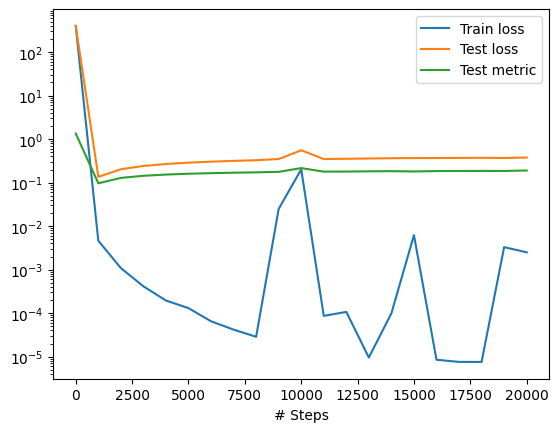

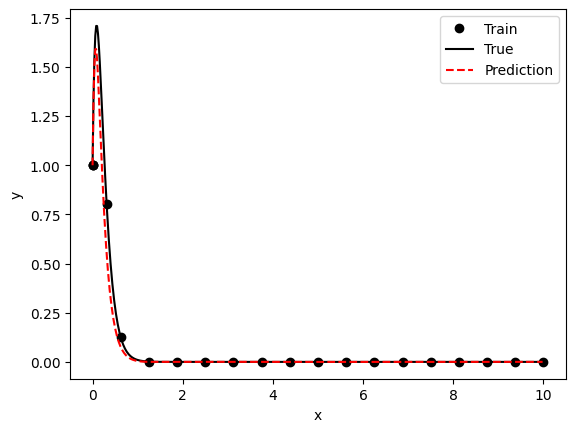

In [2]:
# -*- coding: utf-8 -*-
"""Untitled8.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Oxn51qfeNYwwJXysfhNJ21tH3yn8EREH
"""

import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
import math
from math import sqrt
from deepxde.backend import tf

geom = dde.geometry.TimeDomain(0,10)
def ode(t,y):
    dy_dt = dde.grad.jacobian(y,t)
    d2y_dt2 = dde.grad.hessian(y,t)
    return d2y_dt2 + 16*dy_dt + 64*y

def func(t):
    return np.exp(-8*t)*(1 + 28*t)
ic1 = dde.icbc.IC(geom,lambda x:1, lambda _ , on_initial: on_initial)

def boundary_1(t,on_boundary):
    return on_boundary and dde.utils.isclose(t[0], 0)

def error_2(inputs,outputs,X):
    return dde.grad.jacobian(outputs,inputs,i=0, j=None ) - 20

ic2 = dde.icbc.OperatorBC(geom,error_2,boundary_1)

data = dde.data.TimePDE(geom, ode, [ic1, ic2], 16, 2, solution=func, num_test=500)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)
model = dde.Model(data, net)
model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], loss_weights=[0.01, 1, 1]
)
losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)


Compiling model...
Building feed-forward neural network...
'build' took 0.063121 s

'compile' took 0.561429 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [6.19e-01, 1.00e+00, 7.88e-01]    [6.52e-01, 1.00e+00, 7.88e-01]    [1.01e+00]    
1000      [2.80e-04, 1.52e-07, 8.94e-09]    [7.02e-04, 1.52e-07, 8.94e-09]    [3.18e-03]    
2000      [7.32e-05, 1.26e-05, 4.08e-06]    [3.04e-04, 1.26e-05, 4.08e-06]    [4.87e-03]    
3000      [3.45e-05, 4.54e-09, 1.07e-09]    [2.37e-04, 4.54e-09, 1.07e-09]    [1.98e-03]    
4000      [2.34e-05, 2.14e-09, 4.66e-10]    [1.95e-04, 2.14e-09, 4.66e-10]    [1.84e-03]    
5000      [1.76e-05, 1.07e-09, 4.76e-10]    [1.70e-04, 1.07e-09, 4.76e-10]    [1.71e-03]    
6000      [4.44e-05, 5.27e-09, 1.60e-05]    [1.60e-04, 5.27e-09, 1.60e-05]    [2.40e-03]    
7000      [1.14e-05, 3.41e-10, 1.45e-10]    [1.33e-04, 3.41e-10, 1.45e-10]    [1.54e-03]    
8000      [9.90e-06, 2.51e-11, 1.

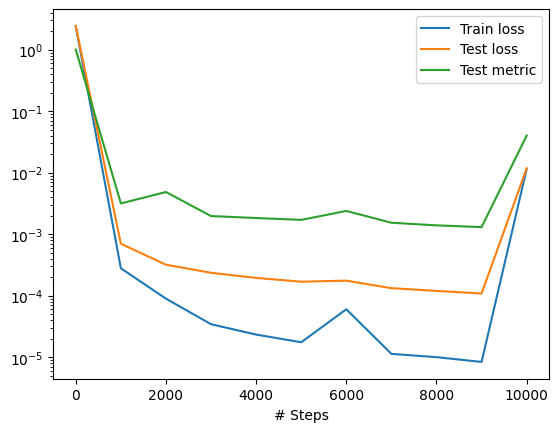

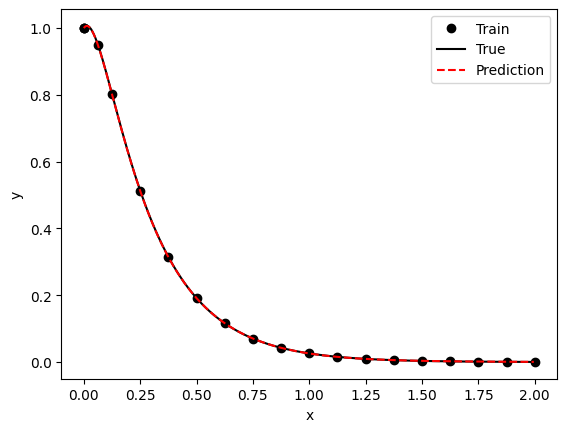

In [3]:
import deepxde as dde
import numpy as np


def ode(t, y):
    dy_dt = dde.grad.jacobian(y, t)
    d2y_dt2 = dde.grad.hessian(y, t)
    return d2y_dt2 + 20 * dy_dt + 64 * y


def func(t):
    return  (17/12)*np.exp(-4*t) - (5/12)*np.exp(-16*t)

geom = dde.geometry.TimeDomain(0, 2)


def boundary_l(t, on_initial):
    return on_initial and dde.utils.isclose(t[0], 0)


def bc_func1(inputs, outputs, X):
    return outputs + 1


def bc_func2(inputs, outputs, X):
    return dde.grad.jacobian(outputs, inputs, i=0, j=None) - 1


ic1 = dde.icbc.IC(geom, lambda x: 1, lambda _, on_initial: on_initial)
ic2 = dde.icbc.OperatorBC(geom, bc_func2, boundary_l)

data = dde.data.TimePDE(geom, ode, [ic1, ic2], 16, 2, solution=func, num_test=500)
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], loss_weights=[0.01, 1, 1]
)
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)